Description of the data Can be found at https://crashstats.nhtsa.dot.gov/Api/Public/ViewPublication/812315

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# machine learning
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from subprocess import check_output

# Block all warning for presentation to look clean
import warnings
warnings.filterwarnings('ignore')

#Print all rows and columns. Dont hide any
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
pwd

'C:\\Users\\arkah\\Project_Accidents'

In [4]:
#Data Files We have
import os
filelist = os.listdir("data/")

In [150]:
df_byyear = pd.DataFrame()
for i in range(len(filelist)):
    df_byyear = pd.concat([df_byyear,pd.read_csv('data/'+ filelist[i])],axis=0)

In [152]:
df=df_byyear
df.index = range(len(df_byyear))

In [105]:
df = pd.read_csv('data/accident_2015.csv')

In [153]:
states = {1: 'Alabama', 2: 'Alaska', 4: 'Arizona', 5: 'Arkansas', 
          6: 'California', 8: 'Colorado', 9: 'Connecticut', 10: 'Delaware', 
          11: 'District of Columbia', 12: 'Florida', 13: 'Georgia', 15: 'Hawaii', 
          16: 'Idaho', 17: 'Illinois', 18: 'Indiana', 19: 'Iowa', 20: 'Kansas', 
          21: 'Kentucky', 22: 'Louisiana', 23: 'Maine', 24: 'Maryland', 
          25: 'Massachusetts', 26: 'Michigan', 27: 'Minnesota', 
          28: 'Mississippi', 29: 'Missouri', 30: 'Montana', 31: 'Nebraska', 
          32: 'Nevada', 33: 'New Hampshire', 34: 'New Jersey', 35: 'New Mexico', 
          36: 'New York', 37: 'North Carolina', 38: 'North Dakota', 39: 'Ohio', 
          40: 'Oklahoma', 41: 'Oregon', 42: 'Pennsylvania', 43: 'Puerto Rico', 
          44: 'Rhode Island', 45: 'South Carolina', 46: 'South Dakota', 47: 'Tennessee', 
          48: 'Texas', 49: 'Utah', 50: 'Vermont', 51: 'Virginia', 52: 'Virgin Islands', 
          53: 'Washington', 54: 'West Virginia', 55: 'Wisconsin', 56: 'Wyoming'}

df['state']=df['STATE'].apply(lambda x: states[x])

In [154]:
df['state'].value_counts().to_frame().transpose()

,Texas,California,Florida,North Carolina,Georgia,Pennsylvania,New York,Ohio,Tennessee,Illinois,Michigan,Alabama,South Carolina,Arizona,Missouri,Virginia,Indiana,Louisiana,Kentucky,Oklahoma,Mississippi,New Jersey,Wisconsin,Arkansas,Maryland,Colorado,Washington,Minnesota,Kansas,Oregon,Massachusetts,Iowa,New Mexico,West Virginia,Nevada,Connecticut,Utah,Montana,Nebraska,Idaho,Maine,Wyoming,South Dakota,North Dakota,New Hampshire,Delaware,Hawaii,Alaska,Rhode Island,Vermont,District of Columbia
state,30423,29614,24992,12630,12353,11920,10927,10069,9396,9144,8876,8322,8288,7858,7837,7280,7194,7099,7000,6259,6134,5569,5383,5072,4789,4618,4545,3714,3539,3490,3467,3322,3216,3012,2677,2551,2303,1950,1948,1940,1434,1198,1159,1144,1097,1051,1027,613,595,590,246


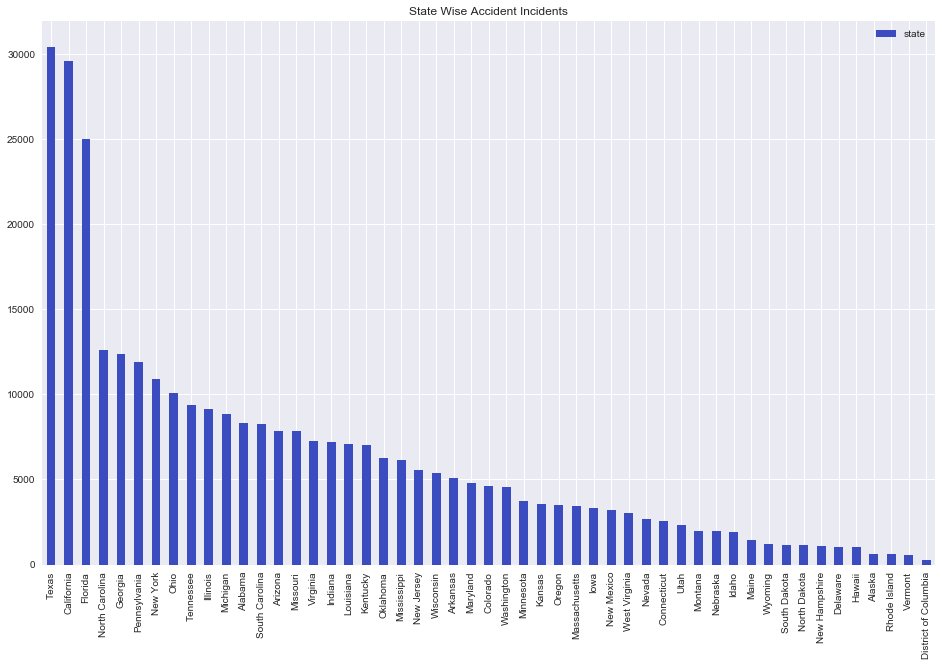

In [155]:
# Plotting State Wise Accident Incidents
df['state'].value_counts().to_frame().plot(kind='bar',figsize=(16,10),title='State Wise Accident Incidents',cmap='coolwarm')

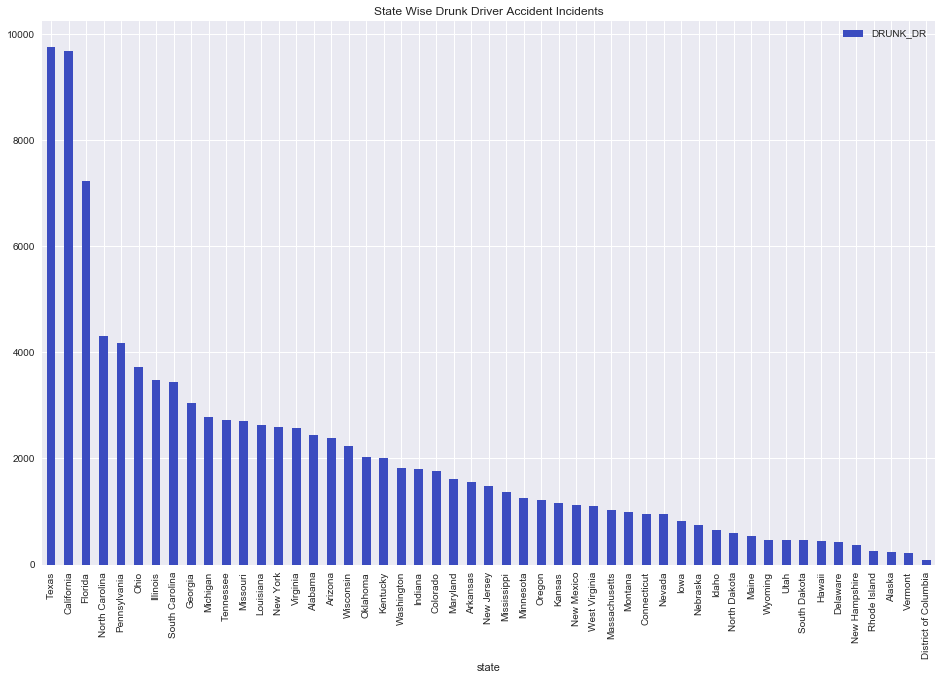

In [156]:
#Drunk Driver Accident incidents
df_drunk = pd.concat([df['state'],df['DRUNK_DR']],axis=1)
df_drunk.groupby('state').sum().sort_index(by='DRUNK_DR',ascending=False).plot(kind='bar',figsize=(16,10),title='State Wise Drunk Driver Accident Incidents',cmap='coolwarm')

In [157]:
df_nd.head()

,Total Accidents,Accidents Because of Drunk Drivers,Accidents Because of NON Drunk Drivers
Alabama,8322,2445.0,5877.0
Alaska,613,243.0,370.0
Arizona,7858,2391.0,5467.0
Arkansas,5072,1560.0,3512.0
California,29614,9681.0,19933.0


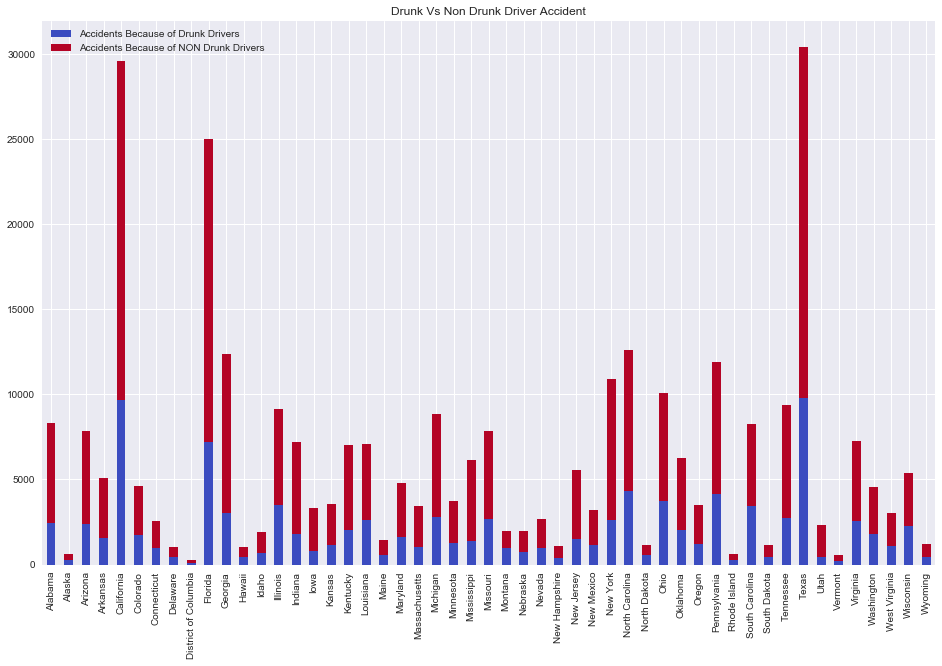

In [158]:
df_nd = pd.concat([df['state'].value_counts().to_frame() , df_drunk.groupby('state').sum().sort_index(by='DRUNK_DR',ascending=False)],axis=1,)
df_nd['Accidents Because of NON Drunk Drivers']  = df_nd.state -  df_nd.DRUNK_DR
df_nd.columns = ['Total Accidents','Accidents Because of Drunk Drivers','Accidents Because of NON Drunk Drivers']
df_nd.iloc[:,1:3].plot(kind='bar',figsize=(16,10),title='Drunk Vs Non Drunk Driver Accident',stacked=True,cmap='coolwarm')

In [160]:
df[['HOUR','MINUTE']]=df[['HOUR','MINUTE']].apply(lambda x:[23,59] if int(x[0])==24 else x,axis=1)
df=df[df['DAY']!=99]

In [164]:
def f(x):
    year = x[0]
    month = x[1]
    day = x[2]
    hour = x[3]
    minute = x[4]
    # Sometimes they don't know hour and minute
    if hour == 99:
        hour = 0
    if minute == 99:
        minute = 0
    s = "%02d-%02d-%02d %02d:%02d:00" % (year,month,day,hour,minute)
    c = datetime.datetime.strptime(s,'%Y-%m-%d %H:%M:%S')
    return c
 
df['crashTime']   = df[['YEAR','MONTH','DAY','HOUR','MINUTE']].apply(f, axis=1)
df['crashDay']    = df['crashTime'].apply(lambda x: x.date())
df['crashMonth']  = df['crashTime'].apply(lambda x: x.strftime("%b") )
df['crashMonthN'] = df['crashTime'].apply(lambda x: x.strftime("%d") ) # sorting
df['crashTime'].head()

0   2007-01-02 23:15:00
1   2007-01-30 13:05:00
2   2007-01-14 12:13:00
3   2007-01-01 15:00:00
4   2007-01-06 19:35:00
Name: crashTime, dtype: datetime64[ns]

In [165]:
df[['YEAR','MONTH','DAY','HOUR','MINUTE']].head()

,YEAR,MONTH,DAY,HOUR,MINUTE
0,2007.0,1.0,2.0,23.0,15.0
1,2007.0,1.0,30.0,13.0,5.0
2,2007.0,1.0,14.0,12.0,13.0
3,2007.0,1.0,1.0,15.0,0.0
4,2007.0,1.0,6.0,19.0,35.0


In [166]:
df['crashMonth'].value_counts()

Aug    29686
Oct    29269
Jul    29245
Sep    28294
Jun    28114
May    27910
Nov    27197
Dec    26411
Apr    25427
Mar    24594
Jan    23269
Feb    21457
Name: crashMonth, dtype: int64

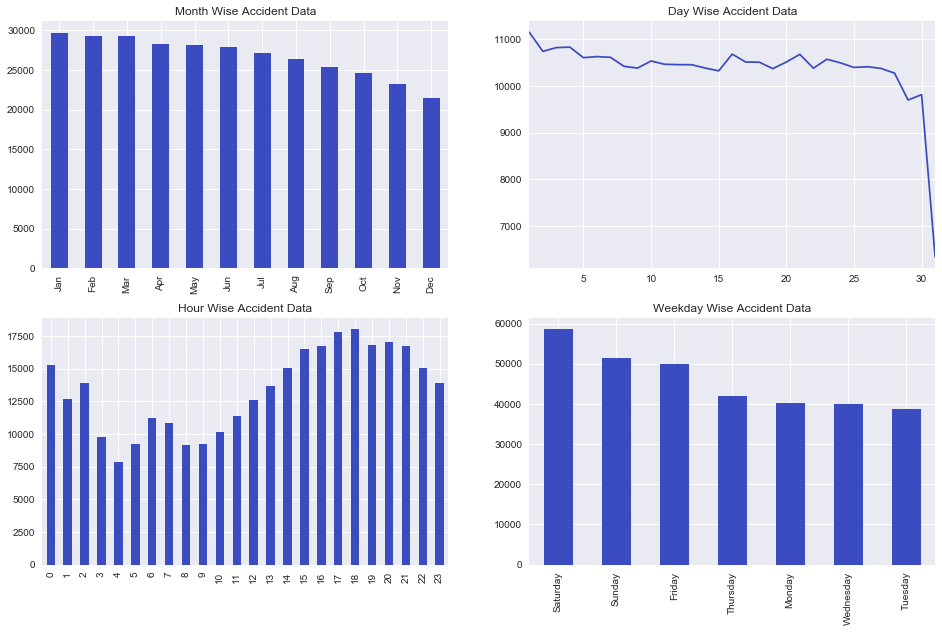

In [167]:
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(16, 10))
k=df['crashMonth'].value_counts()
k.index  = ['Jan', 'Feb', 'Mar', 'Apr','May','Jun', 'Jul', 'Aug','Sep', 'Oct', 'Nov', 'Dec']
k.plot(ax=axes[0,0],kind='bar',title='Month Wise Accident Data',cmap='coolwarm')


df['crashTime'].apply(lambda x:x.day).value_counts().sort_index().plot(ax=axes[0,1],title='Day Wise Accident Data',cmap='coolwarm')

df['crashTime'].apply(lambda x:x.hour).value_counts().sort_index().plot(kind='bar',ax=axes[1,0],title='Hour Wise Accident Data',cmap='coolwarm')

df['crashTime'].apply(lambda x:x.strftime('%A')).value_counts().plot(kind='bar',ax=axes[1,1],title='Weekday Wise Accident Data',cmap='coolwarm')

In [178]:
df['WEATHER'].value_counts()
1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',99:'unknown',3:'sleet',98:'unreported',8:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}


1.0     250277
10.0     33679
2.0      22172
4.0       4687
5.0       3562
98.0      2121
99.0      1208
3.0       1166
9.0        698
6.0        492
8.0        399
11.0       210
7.0        118
12.0        84
Name: WEATHER, dtype: int64

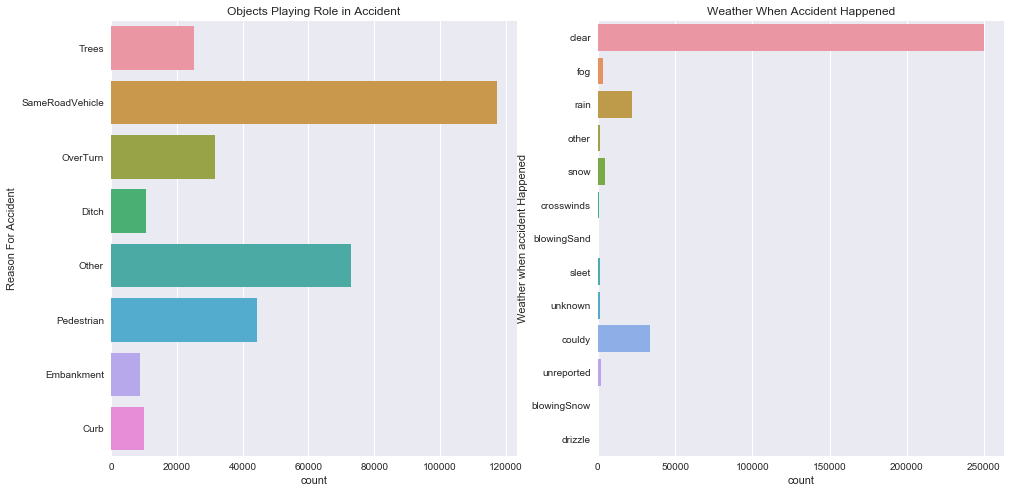

In [182]:
f, (ax1, ax2) = plt.subplots(1,2,figsize=(16,8))
df['HARM_EV'].value_counts().head()
harm_ev= {12: 'SameRoadVehicle', 8: 'Pedestrian', 1: 'OverTurn', 42: 'Trees', 
          33: 'Curb', 34: 'Ditch', 35: 'Embankment'}

df['harm_ev']=df['HARM_EV'].apply(lambda x: harm_ev[x] if (x==12 or x==8 or x==1 or x==42 or x==33 or x==34 or x== 35)  else 'Other')
#df['harm_ev'].value_counts().plot(kind='bar',title='Environment Playing Role in Accident',cmap='coolwarm')
sns.countplot(y=df['harm_ev'],ax=ax1)
ax1.set_ylabel('Reason For Accident')
ax1.set_title('Objects Playing Role in Accident')


df['WEATHER'].value_counts()
weather = {1:'clear',10:'couldy',2:'rain',5:'fog',4:'snow',99:'unknown',3:'sleet',98:'unreported',8:'other',9:'other',12:'drizzle',11:'blowingSnow',6:'crosswinds',7:'blowingSand'}

df['weather']=df['WEATHER'].apply(lambda x: weather[x] )
sns.countplot(y=df['weather'],ax=ax2)
plt.ylabel('Weather when accident Happened')
plt.title('Weather When Accident Happened')
#df['weather'].value_counts().plot.bar(figsize=(8,4))

In [ ]:
df.columns

In [ ]:
df['crashTime'].head()

In [18]:
rng = pd.date_range('1/1/2015','31/12/2015',  freq='1H')

In [19]:
ts = pd.Series(np.random.randint(0, 5, len(rng)), index=rng)

In [20]:
ts.head()

2015-01-01 00:00:00    1
2015-01-01 01:00:00    0
2015-01-01 02:00:00    0
2015-01-01 03:00:00    1
2015-01-01 04:00:00    3
Freq: H, dtype: int32

In [22]:
df['crashTime'][0]

Timestamp('2015-01-01 02:40:00')

In [23]:
df['crashTime'].dt.day[0]

1

In [93]:
ts_count.head()
datetime.datetime.

,index,Crash_no,Day,Month,Hour,Weekday
0,2015-01-01 00:00:00,5.0,1,Jan,0,Thursday
1,2015-01-01 01:00:00,12.0,1,Jan,1,Thursday
2,2015-01-01 02:00:00,17.0,1,Jan,2,Thursday
3,2015-01-01 03:00:00,6.0,1,Jan,3,Thursday
4,2015-01-01 04:00:00,7.0,1,Jan,4,Thursday


In [29]:
ts_count= pd.DataFrame(m['crashTime'].apply(lambda x:x.replace(microsecond=0,second=0,minute=0)).value_counts(),index=rng)

ts_count.columns=['Crash_no']

ts_count['Crash_no'].fillna(0)
ts_count.reset_index(inplace=True)
ts_count.columns
ts_count['Day']    = ts_count['index'].apply(lambda x: x.day)
ts_count['Month']  = ts_count['index'].apply(lambda x: x.strftime("%b") )
ts_count['Hour']  = ts_count['index'].apply(lambda x: x.hour )
ts_count['Weekday'] = ts_count['index'].apply(lambda x:x.strftime('%A'))

In [205]:
rng = pd.date_range('1/1/2007','31/12/2015',  freq='1H')
df_day= pd.DataFrame(df['crashTime'].apply(lambda x:x.replace(microsecond=0,second=0,minute=0)).value_counts(),index=rng)

df_day.columns=['Crash_no']

df_day['Crash_no'].fillna(0)
df_day.reset_index(inplace=True)
df_day.columns
df_day['Day']    = df_day['index'].apply(lambda x: x.day)
df_day['Month']  = df_day['index'].apply(lambda x: x.strftime("%b") )
df_day['Hour']  = df_day['index'].apply(lambda x: x.hour )
df_day['Weekday'] = df_day['index'].apply(lambda x:x.strftime('%A'))
df_day['Year'] = df_day['index'].apply(lambda x:x.strftime('%G'))
df_stats=df_day
df_stats['Crash_no']=df_stats['Crash_no'].fillna(0)


df_stats['Hour']=df_stats['Hour'].apply(str)
df_stats['Day']=df_stats['Day'].apply(str)
df_stats['Year']=df_stats['Year'].apply(str)
import statsmodels.formula.api as smf
mod = smf.ols(formula='Crash_no ~ Year+ Hour+ Day+ Month+Weekday', data=df_stats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_no   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     261.7
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:44:21   Log-Likelihood:            -1.7229e+05
No. Observations:               78865   AIC:                         3.447e+05
Df Residuals:                   78786   BIC:                         3.455e+05
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.2791 

I've included the hourly model as you have asked for it. But as you can see with this we only achieve Adjusted R^2 of 20.5% which
means only 20.5% variance of the data can be predicted with this model. Which is not a good enough model. So, we go for day wise model.

In [33]:
ts_count.head()

,index,Crash_no,Day,Month,Hour,Weekday
0,2015-01-01 00:00:00,5.0,1,Jan,0,Thursday
1,2015-01-01 01:00:00,12.0,1,Jan,1,Thursday
2,2015-01-01 02:00:00,17.0,1,Jan,2,Thursday
3,2015-01-01 03:00:00,6.0,1,Jan,3,Thursday
4,2015-01-01 04:00:00,7.0,1,Jan,4,Thursday


In [34]:
df_ml = ts_count[['Day', 'Month', 'Hour', 'Weekday','Crash_no']]

In [35]:
ts_count.columns

Index(['index', 'Crash_no', 'Day', 'Month', 'Hour', 'Weekday'], dtype='object')

In [36]:
df_ml.head()

,Day,Month,Hour,Weekday,Crash_no
0,1,Jan,0,Thursday,5.0
1,1,Jan,1,Thursday,12.0
2,1,Jan,2,Thursday,17.0
3,1,Jan,3,Thursday,6.0
4,1,Jan,4,Thursday,7.0


In [206]:
rng = pd.date_range('1/1/2007','31/12/2015',  freq='1D')
df_day= pd.DataFrame(df['crashTime'].apply(lambda x:x.replace(microsecond=0,second=0,minute=0,hour=0)).value_counts(),index=rng)

df_day.columns=['Crash_no']

df_day['Crash_no'].fillna(0)
df_day.reset_index(inplace=True)
df_day.columns
df_day['Day']    = df_day['index'].apply(lambda x: x.day)
df_day['Month']  = df_day['index'].apply(lambda x: x.strftime("%b") )
df_day['Hour']  = df_day['index'].apply(lambda x: x.hour )
df_day['Weekday'] = df_day['index'].apply(lambda x:x.strftime('%A'))
df_day['Year'] = df_day['index'].apply(lambda x:x.strftime('%G'))

df_stats=df_day
df_stats['Crash_no']=df_stats['Crash_no'].fillna(0)


df_stats['Hour']=df_stats['Hour'].apply(str)
df_stats['Day']=df_stats['Day'].apply(str)
df_stats['Year']=df_stats['Year'].apply(str)

import statsmodels.formula.api as smf
mod = smf.ols(formula='Crash_no ~ Day+ Month+Weekday+Year', data=df_stats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_no   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     120.2
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:50:05   Log-Likelihood:                -12757.
No. Observations:                3287   AIC:                         2.563e+04
Df Residuals:                    3231   BIC:                         2.597e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              113.7856 

Here Adjusted R sq =66.6. So,66.6% of the variance of the data is explainable with only these features only and all the variables are statistically signficanta as the p-value is low. This is our model. Or if we need a simpler model with less features, We can try out different models. 


In [208]:
mod = smf.ols(formula='Crash_no ~ Month+Weekday+Year', data=df_stats)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:               Crash_no   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     258.5
Date:                Sat, 02 Dec 2017   Prob (F-statistic):               0.00
Time:                        12:51:25   Log-Likelihood:                -12792.
No. Observations:                3287   AIC:                         2.564e+04
Df Residuals:                    3261   BIC:                         2.580e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              107.8835 

We tried this model to removing the day feature. Adj R Sq= 66.2%. Difference is 0.4% with the earlier model. But the earlier model is obviously better one. But if we want something with lesser feature we can consider this one, but our model will be predicting with 0.4% less accuracy.

In [209]:
x = pd.concat([pd.get_dummies(df_day['Day'], prefix ='Day',drop_first=True),pd.get_dummies(df_day['Month'], prefix ='Month',drop_first=True),
              pd.get_dummies(df_day['Weekday'], prefix ='Weekday',drop_first=True),pd.get_dummies(df_day['Year'], prefix ='Year',drop_first=True)], axis=1)
Y= df_day['Crash_no'].fillna(0)

In [210]:
x.head()

,Day_10,Day_11,Day_12,Day_13,Day_14,Day_15,Day_16,Day_17,Day_18,Day_19,Day_2,Day_20,Day_21,Day_22,Day_23,Day_24,Day_25,Day_26,Day_27,Day_28,Day_29,Day_3,Day_30,Day_31,Day_4,Day_5,Day_6,Day_7,Day_8,Day_9,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [211]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, Y, test_size=0.3, random_state=0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

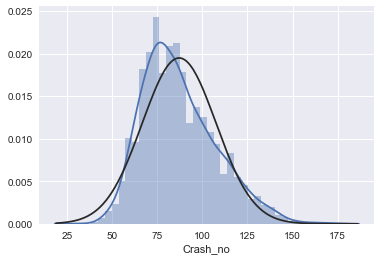

In [212]:
from scipy.stats import norm
sns.distplot(Y,fit=norm);

In [213]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [214]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [215]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [216]:
models =[lm,lasso,ENet,KRR,GBoost,model_xgb,model_lgb]
model_name=['Multiple Linear Regression','Lasso Regression','Elastic Net','Kernel Ridge','Gradient Boosting','Xg Boost','Light Gradient Boosting']

In [217]:
model_score=pd.DataFrame(columns=['Name','Mean_Rmse','Std_dev'])
for i in range(len(models)):
    model_score.loc[i,'Name'] = model_name[i]
    model_score.loc[i,'Mean_Rmse'] = rmsle_cv(models[i]).mean()
    model_score.loc[i,'Std_dev'] = rmsle_cv(models[i]).std()

In [218]:
model_score

,Name,Mean_Rmse,Std_dev
0,Multiple Linear Regression,0.576845,0.0231366
1,Lasso Regression,0.576736,0.0241598
2,Elastic Net,0.576768,0.0241771
3,Kernel Ridge,0.578823,0.0249323
4,Gradient Boosting,0.557086,0.0253957
5,Xg Boost,0.56361,0.0247817
6,Light Gradient Boosting,0.572354,0.0258934


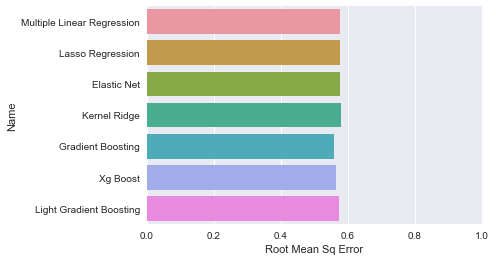

In [223]:
sns.barplot(y='Name',x='Mean_Rmse',data=model_score)
plt.xlim(0,1);
plt.xlabel('Root Mean Sq Error')

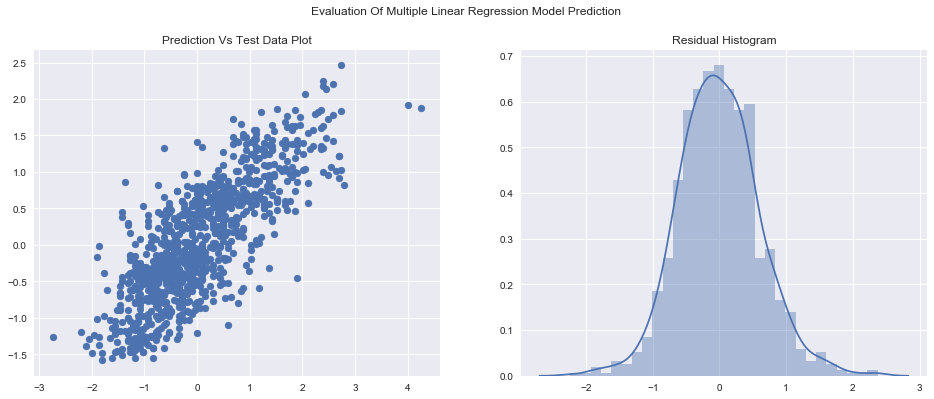

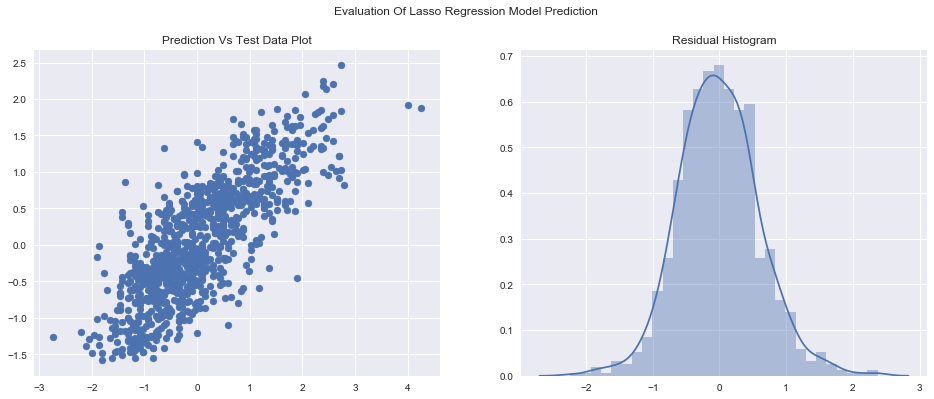

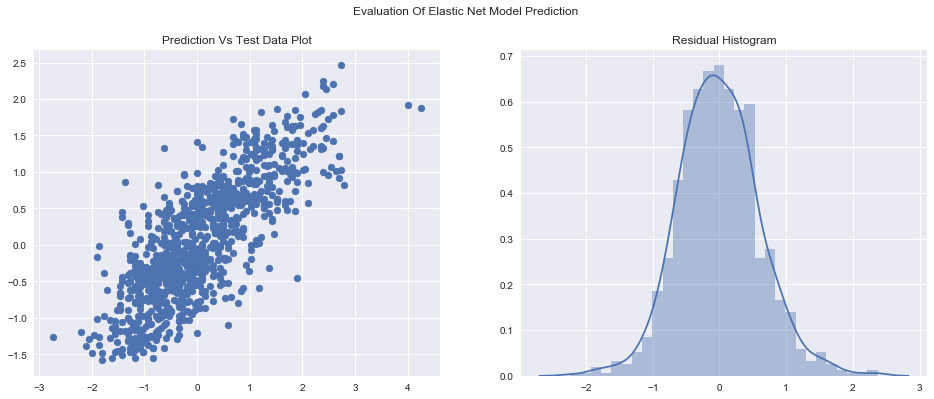

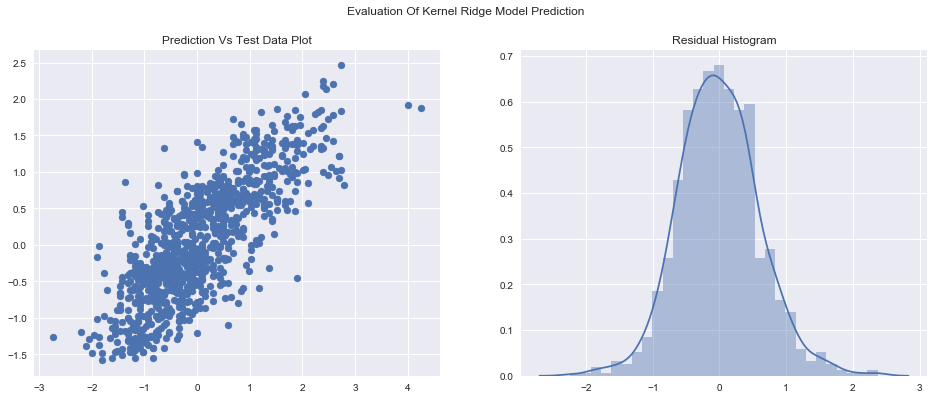

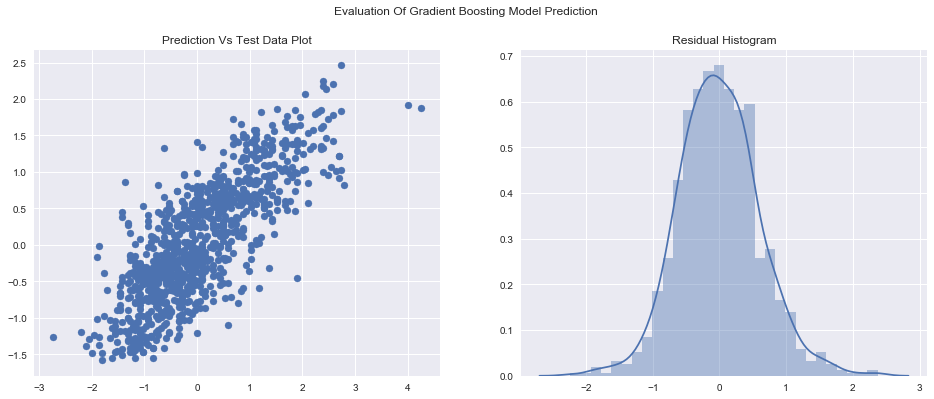

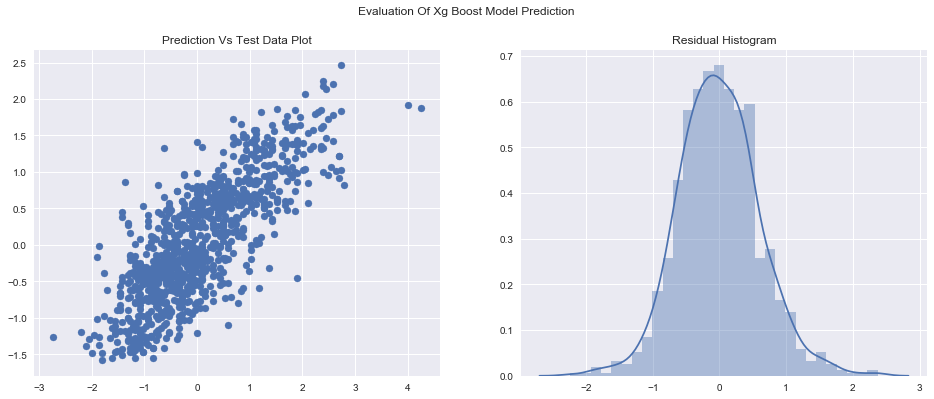

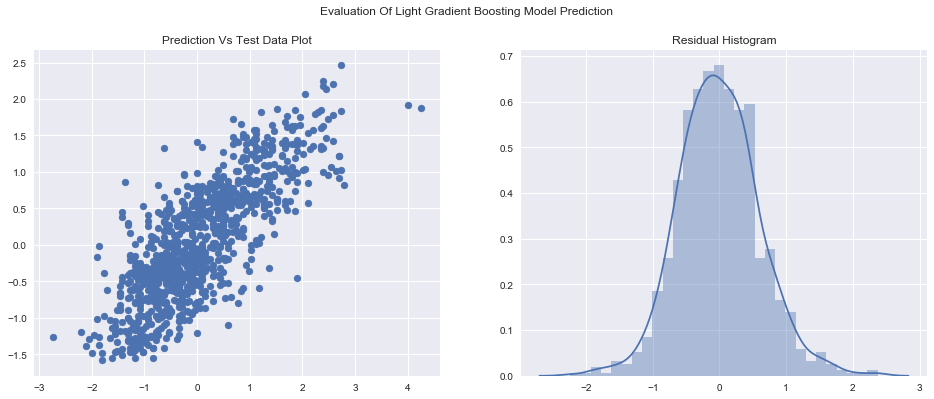

In [220]:
for i in range(len(models)):
    models[0].fit(X_train,y_train)
    predictions = models[0].predict(X_test)
    fig,axes = plt.subplots(nrows=1, ncols=2,figsize=(16,6))
    axes[0].scatter(y_test,predictions)
    axes[0].set_title('Prediction Vs Test Data Plot')
    plt.legend()

    sns.distplot((y_test-predictions),bins=30,ax=axes[1]);
    axes[1].set_title('Residual Histogram')
    plt.suptitle('Evaluation Of '+model_name[i]+ ' Model Prediction')


After Checking all the models we can conclude the Gradient Boosting Model Performs the best with the least Root mean square Error of 0.557086. 

Furthur Improvements:
     We can try with more features and with different interval of time to check the likelyhood of accidents.